In [ ]:
'''
Um estudo de caso entre os algoritimos Regressão Linear, Árvore de Decisão e Regressor KNeighbors.
Link Dataset Kaggle: https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/data
'''

'\nUm estudo de caso entre os algoritimos Regressão Linear, Árvore de Decisão e Regressor KNeighbors.\nLink Dataset Kaggle: https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/data\n'

In [ ]:
!pip install pandas numpy matplotlib seaborn scikit-learn kneed xgboost streamlit

In [ ]:
# Importar todas as Bibliotecas
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# Importar dataset de treino
base = pd.read_csv('data/train.csv')

In [ ]:
# Visualizando essa base
base

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [ ]:
# Visualizar as 3 primeiras linhas
base.head(3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500


In [ ]:
# Visualizar as 3 últimas linhas
base.tail(3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125
1459,1460,20,RL,75.0,9937,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Normal,147500


In [ ]:
# Retornando o shape da base
base.shape

(1460, 81)

In [ ]:
# E as informações
base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [ ]:
# Visualizando quantidade de vealores vazios
base.isnull().sum().sort_values(ascending=False).head(23)

,0
PoolQC,1453
MiscFeature,1406
Alley,1369
Fence,1179
MasVnrType,872
FireplaceQu,690
LotFrontage,259
GarageQual,81
GarageFinish,81
GarageType,81


In [ ]:
# Visualizar a percentagem de nulls da base de dados
(base.isnull().sum()/base.shape[0]).sort_values(ascending=False).head(23)

,0
PoolQC,0.995205
MiscFeature,0.963014
Alley,0.937671
Fence,0.807534
MasVnrType,0.597260
FireplaceQu,0.472603
LotFrontage,0.177397
GarageQual,0.055479
GarageFinish,0.055479
GarageType,0.055479


In [ ]:
# Eliminar colulas com mais de 10% de valores de valores vazios
eliminar = base.columns[(base.isnull().sum()/base.shape[0]) > 0.1]
eliminar

Index(['LotFrontage', 'Alley', 'MasVnrType', 'FireplaceQu', 'PoolQC', 'Fence',
       'MiscFeature'],
      dtype='object')

In [ ]:
# Eliminar essas colunas
base = base.drop(eliminar,axis=1)

In [ ]:
# Visualizar a percentagem de nulls da base de dados
(base.isnull().sum()/base.shape[0]).sort_values(ascending=False).head(23)

,0
GarageYrBlt,0.055479
GarageQual,0.055479
GarageCond,0.055479
GarageType,0.055479
GarageFinish,0.055479
BsmtFinType2,0.026027
BsmtExposure,0.026027
BsmtQual,0.025342
BsmtCond,0.025342
BsmtFinType1,0.025342


In [ ]:
# Ver o tipo dos dados
base.dtypes

,0
Id,int64
MSSubClass,int64
MSZoning,object
LotArea,int64
Street,object
...,...
MoSold,int64
YrSold,int64
SaleType,object
SaleCondition,object


In [ ]:
# Verificar os valores diferentes de Objects
base.dtypes != 'object'

,0
Id,True
MSSubClass,True
MSZoning,False
LotArea,True
Street,False
...,...
MoSold,True
YrSold,True
SaleType,False
SaleCondition,False


In [ ]:
# Filtrar colunas diferentes de Object
colunas = base.columns[base.dtypes != 'object']
colunas

Index(['Id', 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [ ]:
# Filtrar o dataset sem colunas com objects
base2 = base.loc[: ,colunas]
base2.head(3)

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,11250,7,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,223500


In [ ]:
# Visualizando quantidade de vealores vazios
base2.isnull().sum().sort_values(ascending=False).head(4)

,0
GarageYrBlt,81
MasVnrArea,8
LotArea,0
MSSubClass,0


In [ ]:
# Substituindo valores vazios por -1
base2 = base2.fillna(-1)
base2.GarageYrBlt.head(3)

,GarageYrBlt
0,2003.0
1,1976.0
2,2001.0


In [ ]:
# Visualizando quantidade de vealores vazios
base2.isnull().sum().sort_values(ascending=False).head(4)

,0
Id,0
MSSubClass,0
LotArea,0
OverallQual,0


<!-- Usando o modelo de Algoritmo para a Predição!!! -->

In [ ]:
# Usando o modelo de algoritmo para a predição...


# Selecionar o X e Y
x = base2.drop('SalePrice', axis=1)
y = base2.SalePrice

In [ ]:
# Importando o train_test_split
# link_doc: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

from sklearn.model_selection import train_test_split

In [ ]:
# Separar a base2 em treino e teste
# link_doc: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [ ]:
'''
  Usando algoritmo Regressor Linear
  Link_doc: https://scikit-learn.org/stable/modules/tree.html
'''

'\n  Usando algoritmo Regressor Linear\n  Link_doc: https://scikit-learn.org/stable/modules/tree.html\n'

In [ ]:
# Importando a Regreção Linear
from sklearn.linear_model import LinearRegression

In [ ]:
# Criar Regressor e fazendo fit com os dados de treinamento.
reg_rl = LinearRegression().fit(X_train, y_train)


In [ ]:
# Fazendo a previsão pros dados de test
y_rl = reg_rl.predict(X_test)

In [ ]:
'''
  Usando algoritmo árvore de decisão
  Link_doc: https://scikit-learn.org/stable/modules/tree.html

'''

'\n  Usando algoritmo árvore de decisão\n  Link_doc: https://scikit-learn.org/stable/modules/tree.html\n\n'

In [ ]:
# Importando árvore de decisão
from sklearn import tree

In [ ]:
# Criar Regressor e fazendo fit com os dados de treinamento.
reg_ar = tree.DecisionTreeClassifier(random_state=42).fit(X_train, y_train)

In [ ]:
# Fazendo a previsão pros dados de test
y_ar = reg_ar.predict(X_test)

In [ ]:
'''
  Usando algoritmo KNN
  Link_doc:https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html
'''

'\n  Usando algoritmo KNN\n  Link_doc:https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html\n'

In [ ]:
# Importar KNN
from sklearn.neighbors import KNeighborsRegressor

In [ ]:
# Criar Regressor e fazendo fit com os dados de treinamento.
reg_knn = KNeighborsRegressor(n_neighbors=2).fit(X_train, y_train)

In [ ]:
# Fazendo a previsão pros dados de test
y_knn = reg_knn.predict(X_test)

In [ ]:
'''
FAzer comparação entre os 3 modelos usando o Erro Médio Absoluto
Link_docs: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_absolute_error.html
'''

'\nFAzer comparação entre os 3 modelos usando o Erro Médio Absoluto\nLink_docs: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_absolute_error.html\n'

In [ ]:
# Importar o Erro médio Absoluto
from sklearn.metrics import mean_absolute_error

In [ ]:
'''
FAzer comparação entre os 3 modelos usando o Erro Médio Quadrático
Link_docs: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html
'''

'\nFAzer comparação entre os 3 modelos usando o Erro Médio Quadrático\nLink_docs: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html\n'

In [ ]:
# Importar o Erro médio Absoluto
from sklearn.metrics import mean_squared_error

In [ ]:
'''
Avaliando Erro na Regreção
'''

'\nAvaliando Erro na Regreção\n'

In [ ]:
# Erro na Regreção Linear
erro_ab_rl = mean_absolute_error(y_test, y_rl)
erro_sq_rl = mean_squared_error(y_test, y_rl)

print(erro_ab_rl)
print(erro_sq_rl)

23763.187393064567
1533982883.444864


In [ ]:
# Erro na Árvore de Decisão
erro_ab_ar = mean_absolute_error(y_test, y_ar)
erro_sq_ar = mean_squared_error(y_test, y_ar)

print(erro_ab_ar)
print(erro_sq_ar)

34290.82780082987
3267429539.840249


In [ ]:
# Erro no KNN
erro_ab_knn = mean_absolute_error(y_test, y_knn)
arro_sq_knn = mean_squared_error(y_test, y_knn)
print(erro_ab_knn)
print(arro_sq_knn)

33273.08298755187
2733937586.841286


Criar gáficos para fazer a comparação entre os 3 modelos

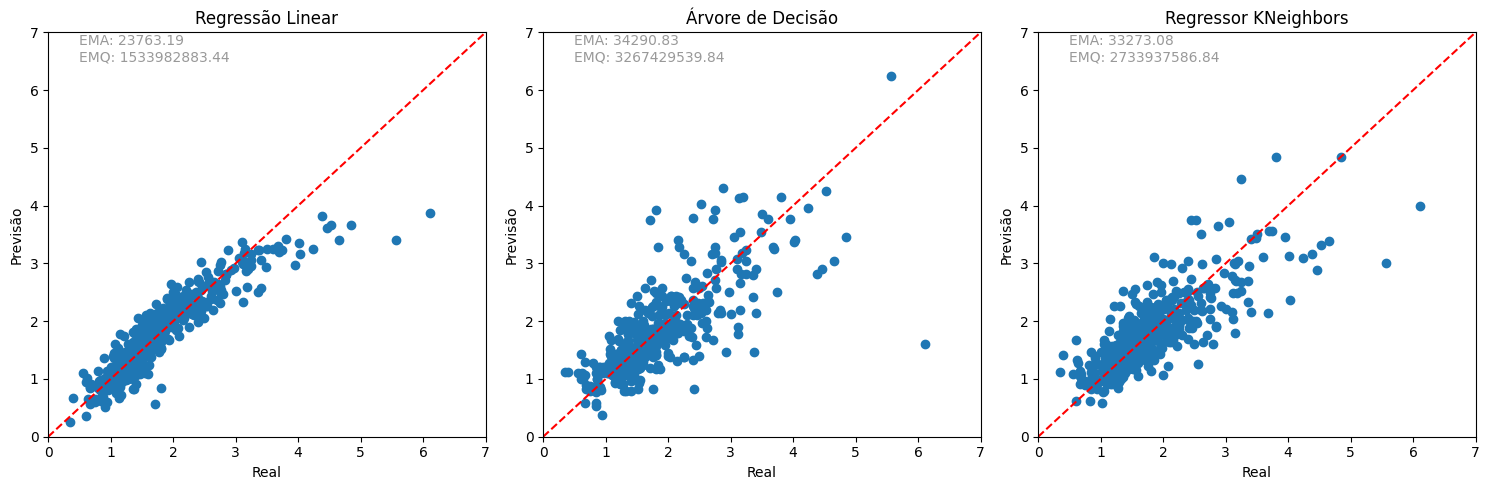

In [ ]:
# Criando esse Gráfico
fig, ax = plt.subplots(ncols=3, figsize=(15,5))

ax[0].scatter( y_test/100000, y_rl/100000 )
ax[0].plot( [0,700000], [0,700000], '--r' )
ax[0].set(xlim = (0, 7), ylim = (0, 7))
ax[0].set_xlabel('Real')
ax[0].set_ylabel('Previsão')
ax[0].set_title('Regressão Linear')  # Título do primeiro gráfico

ax[0].text(0.5, 6.5, f'EMA: {erro_ab_rl:.2f}\nEMQ: {erro_sq_rl:.2f}', ha='left', fontsize=10, color='#999')

ax[1].scatter( y_test/100000, y_ar/100000 )
ax[1].plot( [0,700000], [0,700000], '--r' )
ax[1].set(xlim = (0, 7), ylim = (0, 7))
ax[1].set_xlabel('Real')
ax[1].set_ylabel('Previsão')
ax[1].set_title('Árvore de Decisão')  # Título do segundo gráfico
ax[1].text(0.5, 6.5, f'EMA: {erro_ab_ar:.2f}\nEMQ: {erro_sq_ar:.2f}', ha='left', fontsize=10, color='#999')

ax[2].scatter( y_test/100000, y_knn/100000 )
ax[2].plot( [0,700000], [0,700000], '--r' )
ax[2].set(xlim = (0, 7), ylim = (0, 7))
ax[2].set_xlabel('Real')
ax[2].set_ylabel('Previsão')
ax[2].set_title('Regressor KNeighbors')  # Título do terceiro gráfico
ax[2].text(0.5, 6.5, f'EMA: {erro_ab_knn:.2f}\nEMQ: {arro_sq_knn:.2f}', ha='left', fontsize=10, color='#999')

plt.tight_layout()
plt.show()

In [ ]:
'''
Fazer a Previsão para a base de teste
'''

'\nFazer a Previsão para a base de teste\n'

In [ ]:
# Importar a base de teste

teste = pd.read_csv('data/test.csv')

In [ ]:
# Visualizando essa base
teste

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


In [ ]:
# Visualizar as 3 primeiras linhas do dataset test
teste.head(3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal


In [ ]:
# Visualizar as 3 últimas linhas do dataset test
teste.tail(3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal
1458,2919,60,RL,74.0,9627,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,11,2006,WD,Normal


In [ ]:
# Eliminar essas colunas
teste = teste.drop(eliminar,axis=1)

In [ ]:
# Filtrar colunas diferentes de Object
colunas2 = teste.columns[teste.dtypes != 'object']
colunas2

Index(['Id', 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold'],
      dtype='object')

In [ ]:
# Filtrar o dataset sem colunas com objects
teste = teste.loc[: ,colunas2]
teste.head(3)

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,1461,20,11622,5,6,1961,1961,0.0,468.0,144.0,...,730.0,140,0,0,0,120,0,0,6,2010
1,1462,20,14267,6,6,1958,1958,108.0,923.0,0.0,...,312.0,393,36,0,0,0,0,12500,6,2010
2,1463,60,13830,5,5,1997,1998,0.0,791.0,0.0,...,482.0,212,34,0,0,0,0,0,3,2010


In [ ]:
# Visualizando quantidade de vealores vazios na base de teste
teste.isnull().sum().sort_values(ascending=False).head(11)

,0
GarageYrBlt,78
MasVnrArea,15
BsmtHalfBath,2
BsmtFullBath,2
GarageCars,1
GarageArea,1
BsmtFinSF2,1
BsmtUnfSF,1
TotalBsmtSF,1
BsmtFinSF1,1


In [ ]:
# Substituindo valores vazios por -1
teste = teste.fillna(-1)

In [ ]:
# Visualizando quantidade de vealores vazios
base2.isnull().sum().sort_values(ascending=False).head(4)

,0
Id,0
MSSubClass,0
LotArea,0
OverallQual,0


In [ ]:
'''
  Usando algoritmo Regressor Linear para fazer a predissão da base de test pois foi o que teve menor erro.
  Link_doc: https://scikit-learn.org/stable/modules/tree.html
'''

'\n  Usando algoritmo Regressor Linear para fazer a predissão da base de test pois foi o que teve menor erro.\n  Link_doc: https://scikit-learn.org/stable/modules/tree.html\n'

In [ ]:
# Fazendo a predissão com Regressos Linear
y_pred = reg_rl.predict(teste)


In [ ]:
#  Criar nova coluna de predissão da nossa base de dados
teste['SalePrice'] = y_pred

In [ ]:
# Extrair o Id e o SalePrice
resultado = teste[['Id', 'SalePrice']]

In [ ]:
# Visualizar a tabela resultado
resultado.head(3)

,Id,SalePrice
0,1461,122234.995960
1,1462,139178.263684
2,1463,169872.054251


In [ ]:
# Salvar a base como csv
resultado.to_csv('resultado.csv', index=False)

In [ ]:
# Fazer o download do arquivo gerado
files.download('resultado.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>